In [1]:
%matplotlib inline

908
['n04592741 wing' 'n02692877 airship, dirigible'
 'n03888257 parachute, chute' 'n04552348 warplane, military plane'
 'n04266014 space shuttle']


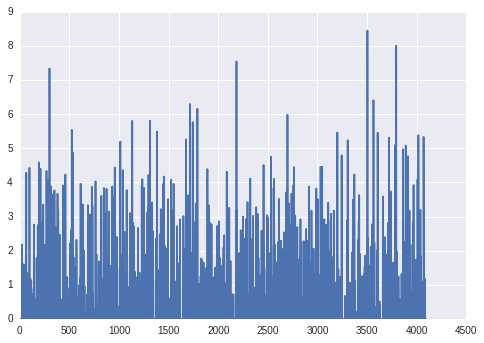

In [82]:
# D. van den Berg
# Source: http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from PIL import Image
import sys
sys.path.append('/home/philipp/caffe/caffe-master/python') 
import caffe

# finding the activation values of the last fully connected neuron layer (fc7) for a single image input

#Init
caffe.set_mode_cpu()

#load the model
model_path = '/home/philipp/caffe/caffe-master/models/bvlc_reference_caffenet/' # substitute your path here
net_fn   = model_path + 'deploy.prototxt'
param_fn = model_path + 'bvlc_reference_caffenet.caffemodel'

net = caffe.Net(net_fn,
                param_fn,
                caffe.TEST)

# load input and configure preprocessing
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('/home/philipp/caffe/caffe-master/python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)

#note we can change the batch size on-the-fly
#since we classify only one image, we change batch size from 10 to 1
net.blobs['data'].reshape(1,3,227,227)

#load the image in the data layer
image_name = 'sky1024px.jpg'
im = caffe.io.load_image('images/'+image_name)
net.blobs['data'].data[...] = transformer.preprocess('data', im)

#compute
out = net.forward()

# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

#predicted predicted class
print(out['prob'].argmax())

#print predicted labels
labels = np.loadtxt("/home/philipp/caffe/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
print(labels[top_k])

#print pre-last layer
x = net.blobs['fc7']
plt.plot(x.data[0]);

In [3]:
len(x.data[0])

4096

In [4]:
import os
print 'number of image files: ', len(os.walk('AVA/trainingset/preprocesed').next()[2])

number of image files:  2500


In [5]:
def get_activation_fc7(image):
#load the image in the data layer
    im = caffe.io.load_image(image)
    net.blobs['data'].data[...] = transformer.preprocess('data', im)
    x = net.blobs['fc7']
    
# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

    # return activations of neuron layer and predicted class as label   
    return x.data[0]

In [93]:
def get_activation_fc7(image):
#load the image in the data layer
    im = caffe.io.load_image(image)
    net.blobs['data'].data[...] = transformer.preprocess('data', im)
    x = net.blobs['fc7']
    
    out = net.forward()

# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

    # return activations of neuron layer and predicted class as label   
    return x.data[0], labels[out['prob'].argmax()]

In [7]:
import glob

labels = np.loadtxt("/home/philipp/caffe/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')

image_path = "AVA/trainingset/preprocesed/*.jpg"

nr_images  = len(glob.glob(image_path))

my_array = np.zeros((nr_images, 4096)) #np array rows, columns
for row_number, image in enumerate(glob.glob(image_path)): #fill an entire row
    my_array[row_number:] = get_activation_fc7(image)  
    

In [96]:
import glob

labels = np.loadtxt("/home/philipp/caffe/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')

image_path = "AVA/trainingset/preprocesed/*.jpg"

nr_images  = len(glob.glob(image_path))

# dict_arrays = dict((x, my_array) for x in labels)

my_array = np.zeros((nr_images, 4096)) #np array rows, columns
for row_number, image in enumerate(glob.glob(image_path)): #fill an entire row
    activations, label     =    get_activation_fc7(image)  
    if label == 'n04592741 wing':
        print 'Condition True for wing label'
        my_array[row_number:] =     activations

Condition True for wing label
Condition True for wing label
Condition True for wing label
Condition True for wing label
Condition True for wing label
Condition True for wing label


In [97]:
labels[908]

'n04592741 wing'

In [98]:
len(labels)

1000

In [99]:
my_array[0].min()

0.0

In [100]:
my_array[0].max()

0.0

In [10]:
np.savetxt("Neuron_activation_penultimate_layer/{}.csv".format(image_name), my_array, delimiter=",")

In [11]:
# from numpy import genfromtxt
my_data = np.genfromtxt("Neuron_activation_penultimate_layer/{}.csv".format(image_name), delimiter=',')

In [101]:
mydata = my_array

In [102]:
dataT = my_data.T
P, D, Q = np.linalg.svd(dataT)

In [103]:
dataT.shape[1]

2500

In [104]:
len(P), len(D), len(Q)

(4096, 2500, 2500)

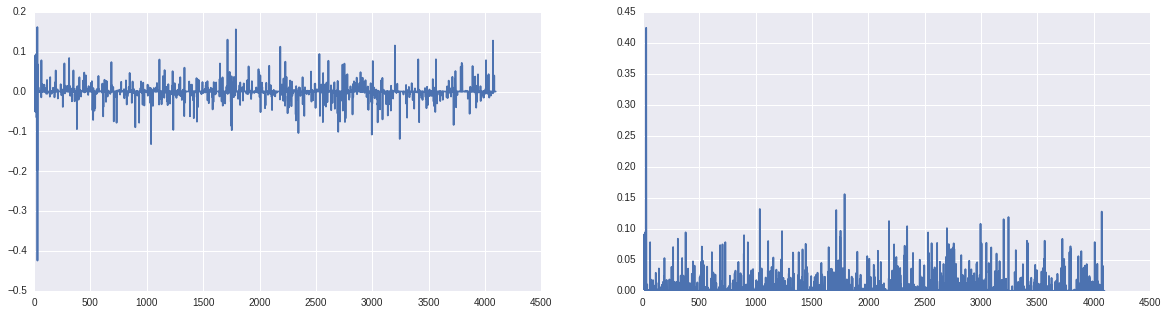

In [105]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(P[:,1])

plt.subplot(122)
plt.plot((np.absolute(P[:,1])));

In [106]:
import pandas as pd
df_P = pd.DataFrame(P[:,1])

In [107]:
print 'Neuron with max positive activation: ', df_P.idxmax()[0], '    Neuron with max negative activation: ', df_P.idxmin()[0]

Neuron with max positive activation:  29     Neuron with max negative activation:  30


#### Singular Value Decomposition (SVD)
The singular values are the spuare root of the eigenvalues of Data*Data.T 

SVD is a data summary method. It only extract important features from data. 

 SVD reconstructs original dataset into small dataset. As a result, many people use it as an image compression. 

Normally, to do a PCA I would calculate the covariance matrix and then find its eigenvectors and corresponding eigenvalues. I understand very well how to interpret both of these, and find it a useful way to get to grips with a data set initially.

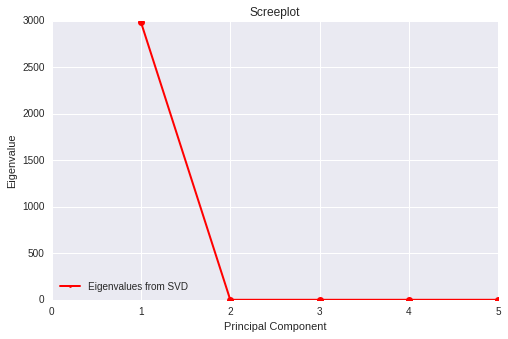

In [108]:
eigvals = D**2 / np.cumsum(D)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(dataT.shape[1]) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Screeplot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.xlim([0, 5])
plt.show()

In [116]:
D

array([  2.98404903e+03,   3.20580520e-10,   3.17403063e-10, ...,
         2.98106756e-13,   2.98106756e-13,   2.98106756e-13])

In [121]:
Q[np.isnan(Q)] = 0

bins = np.logspace(np.log10(min(Q)) , np.log10(max(Q)), num=10)

digitized = np.digitize(Q, bins)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

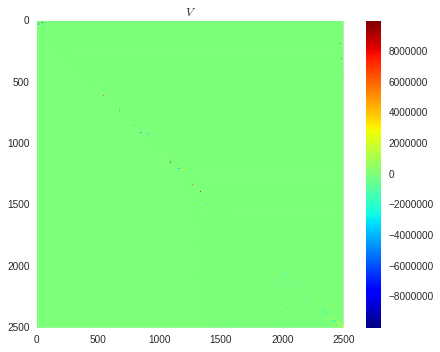

In [130]:
Q =  Q * 10000000
plt.imshow(Q, interpolation='none', cmap='jet')
ax = plt.gca()
plt.title("$V$")
plt.yscale=('log')
plt.xscale=('log')
ax.grid(b=False)
plt.colorbar();